# Cálculo diferencial en varias variables (II)

Unha das funcionalindades máis importantes do módulo **Sympy** é as ferramentas das que dispón para o cálculo de derivadas, xa se traten de derivadas ordinarias (para expresións que dependen dunha única variable) como de derivadas parciais (para expresións definidas a partir de varias variables). Nesta práctica, estudaremos como calcular derivadas de forma implícita, usar a regra da cadea tanto usando a matriz xacobiana ou directamente co comando `sp.diff` e a representación de planos tanxentes a un punto dunha superficie

### Obxectivos:

- Cálculo de derivadas parciais de forma implícita
- Uso da regra da cadea mediante o cálculo da matriz xacobiana
- Cálculo e representación gráfica do plano tanxente nun punto dunha superficie

Para dispoñer do módulo **Sympy** e importalo para o resto do guión de prácticas, usaremos:

In [1]:
import sympy as sp

## Resolución de ecuacións en **Sympy**
Ata o de agora, aínda non precisamos calcular a solución de ecuacións (tanto lineais, polinómicas ou non lineais). Para facelo o módulo **Sympy** posúe a ferramenta `sp.solve`. Vexamos o uso desta función para resolver a ecuación $x^2+3x+a=0$ onde $x$ é a variable a calcular e $a$ é un parámetro constante asumido como coñecido:

In [2]:
x, a = sp.symbols('x a', real=True) # define as variables simbólicas x e y
sol = sp.solve(sp.Eq(x**2+3*x+a,0),x)
display(sol)

[-sqrt(9 - 4*a)/2 - 3/2, sqrt(9 - 4*a)/2 - 3/2]

A mesma función `sp.solve` tamén nos permite resolver sistemas de ecuacións (tanto lineais como non lineais). Por exemplo, se queremos resolver o sistema
$$
\left\{
\begin{array}
 33x^2+2y=1,\\
 x-y =2,
\end{array}
\right.
$$
empregaríase:

In [3]:
x, y = sp.symbols('x y', real=True) # define as variables simbólicas x e y
sol = sp.solve((sp.Eq(3*x**2+2*y,1),sp.Eq(x-y,2)),(x,y))
display(sol)

[(-5/3, -11/3), (1, -1)]

## Derivación implícita
Se queremos calcular as derivadas dunha función que depende dunha ou varias variables non temos porque coñecer a súa expresión de forma explícita, pode vir dada implicitamente. Por exemplo, a función $z=f(x,y)$ pode vir determinada pola expresión $z^2x+2yz+xy=3$. Neste caso, non se coñece de forma explícita cal é a expresión de $f$ en termos de $x$ e $y$. A pesar deste incoveniente é posible calcular  as derivadas parciais $\partial f/\partial x$ e $\partial f/\partial y$ como segue:

In [4]:
x, y = sp.symbols('x y', real=True) # define as variables simbólicas x e y
z = sp.Function('f')(x,y)
eq = sp.Eq(z**2*x+2*y*z+x*y,3)
# Calculo da dereivada implicita con respecto a x
eq_dx = sp.Eq(sp.diff(eq.lhs, x),sp.diff(eq.rhs, x))
z_dx = sp.solve(eq_dx, sp.diff(z,x))
display(z_dx)
# Calculo da dereivada implicita con respecto a y
eq_dy = sp.Eq(sp.diff(eq.lhs, y),sp.diff(eq.rhs, y))
z_dy = sp.solve(eq_dy, sp.diff(z,y))
display(z_dy)

[-(y + f(x, y)**2)/(2*x*f(x, y) + 2*y)]

[-(x/2 + f(x, y))/(x*f(x, y) + y)]

### **Exercicio 7.1** 
Calcula as derivadas parciais da función $u=f(x,y,z)$ tendo en conta que $x^2+y^2+z^2+u^2=1$.

In [5]:
# O TEU CÓDIGO AQUÍ

## Matriz xacobiana e regra da cadea
A regra de derivación ordinaria para a composición de funcións viña dada pola chamda regra da cadea $(f\circ g)'(x)=f'(g(x))g'(x)$. No caso, de funcións de varias variables, formalmente tamén acudiremos á regra da cadea para cálculo multivariable. Por exemplo, se $F:\mathbb{R}^N\to \mathbb{R}$ e $G:\mathbb{R}^{M}\to\mathbb{R}^{N}$ entón, o cálculo do gradiente da composición $F\circ G$ resulta:
$$
\nabla(F\circ G)(x_{1},\ldots,x_{M})=(DG(x_{1},\ldots,x_{M}))^{t}(\nabla F)(G(x_{1},\ldots,x_{M}))
$$
onde $DG$ é a matriz xacobiana da función $G$. Vexamos como facer este cálculo nun caso particular onde 
$$
F(x,y)=3x+2y^2\qquad e \qquad 
G(s,t,r)=
\begin{pmatrix}
2s+t^2\\
r^2s
\end{pmatrix}.
$$
Para implementar este tipo de cálculos matriciais con **Sympy** será útil empregar a clase de obxectos `sp.Matrix` e tamén o uso do método `jacobian` para calcular a matriz xacobiana dunha expresión (ademais tamén teremos en conta que o gradiente dunha función escalar de varias variables é a matriz transposta da matriz xacobiana):

In [6]:
x, y, r, s, t = sp.symbols('x y r s t', real=True) # define as variables simbólicas x e y
# Definición das expresións de F e G
F = sp.Matrix([3*x+2*y**2])
G = sp.Matrix([2*s+t**2, r**2*s])
# Cálculo do gradiente de F
gradient_F = F.jacobian([x,y]).transpose()
display(gradient_F)
# Cálculo da matriz xacobiana de G
DG = G.jacobian([s,t,r])
display(DG)
# Cálculo do gradiente de F(G)
DFoG = DG.transpose()*(gradient_F.subs({x:G[0], y:G[1]}))
display(DFoG)

Matrix([
[  3],
[4*y]])

Matrix([
[   2, 2*t,     0],
[r**2,   0, 2*r*s]])

Matrix([
[4*r**4*s + 6],
[         6*t],
[ 8*r**3*s**2]])

Para comprobar que os cálculo feitos anteriormente son correctos, tamén é posible calcular primeiro a composición de funcións e despois calcular as derivadas parciais usado a función `jacobian`. Tanto dunha forma como doutra o resultado debe ser idéntico. Nesta forma de proceder, usaremos a implementación do gradiente revisada na práctica anterior:

In [7]:
def gradient(expr, varlist):
    return [sp.diff(expr,var) for var in varlist] # cálculo do gradiente almacenado nunha lista

E agora definimos dúas funcións con `sp.Lambda` e calculamos a composición para despois calcular o gradiente.
> ** Nota **: a composición de funcións debe facerse con coidado xa que a función `G` devolve unha lista e para extraer cada un dos elementos da lista e pasalos como argumento da función `F` débese empregar o operador `*`

In [8]:
# Definición das funcións
F = sp.Lambda((x,y),3*x+2*y**2)
G = sp.Lambda((s,t,r),(2*s+t**2,r**2*s))
display('Avaliacion de G como unha lista de expresions:', G(s,t,r))
display('Avaliacion de G duas expresions independentes:', *G(s,t,r))
# Cálculo da composición
FoG = F(*G(s,t,r))
display('Composicion:', FoG)
# Cálculo do gradiente da composición
DFoG = gradient(FoG, (s,t,r))
display('Gradiente:',DFoG)

'Avaliacion de G como unha lista de expresions:'

(2*s + t**2, r**2*s)

'Avaliacion de G duas expresions independentes:'

2*s + t**2

r**2*s

'Composicion:'

2*r**4*s**2 + 6*s + 3*t**2

'Gradiente:'

[4*r**4*s + 6, 6*t, 8*r**3*s**2]

### **Exercicio 7.2** 
Emprega a regra da cadea e a composicion de funcións para calcular o gradiente con respecto ás variables $(t,s)$ da función $w=xyz$ con $x=s+t$, $y=s-t$, e $z=st^2$.

In [9]:
# O TEU CÓDIGO AQUÍ

## Recta tanxente e normal a unha curva
A interpretación xeométrica da derivada ordinaria $f'(x)$ dunha función dunha variable $f(x)$ é clara: $f(x_{0})$ é a pendente da recta tanxente á curva $y=f(x)$ no punto $(x_0,y_0)=(x_0,f(x_{0}))$. Do mesmo xeito, empregando as propiedades do gradiente, se definimos $F(x,y)=y-f(x)$, entón $\nabla F(x_0,y_0)$ é un vector perpendicular á gráfica $y=f(x)$ e polo tanto define o vector director da curva normal á gráfica nese punto. 

Para a representación gráfica tanto de rectas como de planos, empregaremos **Matplotlib**

In [10]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

Vexamos estas propiedades co exemplo $f(x)=x^2+3$ considerendo o punto $x_0=1$:

In [11]:
x, y = sp.symbols('x y', real=True) # define a variable simbólica x
f = sp.Lambda(x, x**2+3)
x0 = 1; y0=f(x0)
# Cálculo da ecuación da recta tanxente
df = sp.Lambda(x, sp.diff(f(x),x))
recta_tang = y0+df(x0)*(x-x0)
# Cálculo da ecuación da recta normal
grad_f = gradient(y-f(x),(x,y))
grad_fun = sp.Lambda((x,y),(grad_f[0],grad_f[1]))
u = grad_fun(x0,y0) # vector director da recta normal
recta_norm = sp.solve(sp.Eq(u[0]*(y-y0)-u[1]*(x-x0),0),y)[0]

Unha vez calculadas as rectas tanxentes e normais, trasladase a información do módulo **Sympy** a **Numpy**, para un uso posterior en **Matplotlib**:

In [12]:
F = sp.lambdify(x,f(x),"numpy") # función numpy coa expresión de f(x,y)
Recta_tang = sp.lambdify(x,recta_tang,"numpy") # función numpy coa expresión vectorial de grad(f)
Recta_norm = sp.lambdify(x,recta_norm,"numpy") # función numpy coa expresión vectorial de grad(f)

Agora pódense usar as funcións de **Numpy** para a representación gráfica da función e das rectas tanxentes e normal:

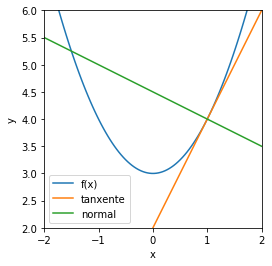

In [13]:
# Creación dos puntos onde se avalían as funcións
xvec = np.linspace(-2, 2, 100)

# Gráfica de sin(x) e cos(x), cunha etiqueta para cada unha
plt.plot(xvec, F(xvec), label='f(x)')
plt.plot(xvec, Recta_tang(xvec), label='tanxente')
plt.plot(xvec, Recta_norm(xvec), label='normal')

# Etiquetas dos eixes
plt.xlabel('x')
plt.ylabel('y')

# Engadir a lenda (mostrando as etiquetas dos "plot")
plt.legend()

# Definir os límites dos eixes x e y
plt.xlim(xvec[0], xvec[-1])
plt.ylim(2,6)
ax = plt.gca()
ax.set_aspect('equal')
plt.show()

### **Exercicio 7.3** 
Calcula e representa graficamente as rectas tanxente e normal da gráfica da función $x-2y^2=1$ no punto $x_0=2$.

In [14]:
# O TEU CÓDIGO AQUÍ

## Plano tanxente e recta normal a unha superficie
Como xa estudamos nas clases de pizarra, o gradiente dunha función $\nabla f$ é un campo de vectores que sempre é perpendicular ás curvas de nivel dunha función de dúas variables $f(x,y)$. Isto tamén é certo para funcións de tres variables $f(x,y,z)$, onde agora o gradiente $\nabla f(x,y,z)$ será perpendicular ás superficies de nivel. Isto nos permite calcular e representar graficamente tanto rectas normais como planos tanxentes a unha superficie dada.

Vexamos estas propiedades co exemplo da superficie $z=x^2+y^2+3$ considerendo o punto $(x_0,y_0)=(1,1/2)$:

In [15]:
x, y, z, t = sp.symbols('x y z t', real=True) # define a variable simbólica x
f = sp.Lambda((x,y), x**2+y**2+3)
x0 = 1; y0=sp.Rational('1/2'); z0=f(x0,y0)
# Cálculo da ecuación do plano tanxente
grad_f = gradient(z-f(x,y),(x,y,z))
grad_fun = sp.Lambda((x,y,z),(grad_f[0],grad_f[1],grad_f[2]))
u = grad_fun(x0,y0,z0) # vector perpendicular a plano
plano_tanx = sp.solve(sp.Eq(u[0]*(x-x0)+u[1]*(y-y0)+u[2]*(z-z0),0),z)[0]
# Cálculo da ecuación vectorial da recta normal
recta_norm = sp.Lambda(t,(x0+t*u[0], y0+t*u[1], z0+t*u[2]))

Unha vez calculadas as rectas tanxentes e normais, trasladase a información do módulo **Sympy** a **Numpy**, para un uso posterior en **Matplotlib**:

In [16]:
F = sp.lambdify((x,y),f(x,y),"numpy") # función numpy coa expresión de f(x,y)
Plano_tanx = sp.lambdify((x,y),plano_tanx,"numpy") # función numpy coa expresión vectorial de grad(f)
Recta_norm = sp.lambdify(t,recta_norm(t),"numpy") # función numpy coa expresión vectorial de grad(f)

Agora pódense usar as funcións de **Numpy** para a representación gráfica da función e das rectas tanxentes e normal:

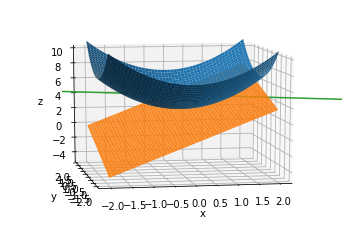

In [17]:
from mpl_toolkits.mplot3d import axes3d
# Nube de puntos para representar a superficie e o plano
N = 50
x = np.linspace(-2, 2, N)
y = np.linspace(-2, 2, N)
X, Y = np.meshgrid(x, y)
Fval = F(X,Y)
Pval = Plano_tanx(X,Y)

# Conxunto de puntos para representar a recta normal
tvec = np.linspace(-2, 2, 100)
Rval = Recta_norm(tvec)

# Creación da figura 3D
fig = plt.figure()
ax = plt.axes(projection="3d")
# Representación da superficie z=F(x,y)
surf_F = ax.plot_surface(X, Y, Fval) 
surf_Plano = ax.plot_surface(X, Y, Pval)
recta = ax.plot3D(*Rval)
# Etiquetas dos eixes
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
# Punto de vista do observador: elevación, ángulo azimutal
ax.view_init(elev=10, azim=-100)
ax.auto_scale_xyz([-2,2],[-2,2],[-5,10])
plt.show()

### **Exercicio 7.4** 
Calcula e representa graficamente o plano tanxente e a recta normal da gráfica da función $x^2+y^2+z^2=1$ no punto $(x_0,y_0,z_0)=(1,1,1)/\sqrt{3}$.

In [18]:
# O TEU CÓDIGO AQUÍ